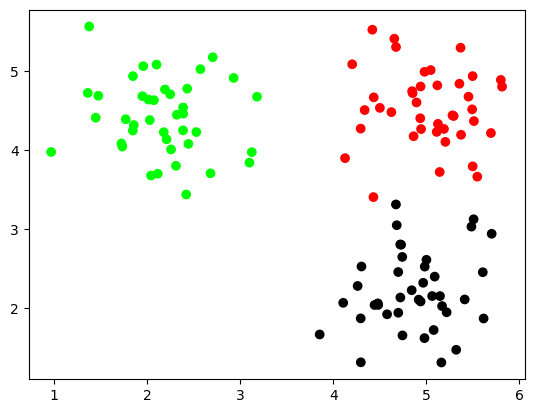

In [5]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

def generateData (numberOfClassEl, numberOfClasses):
    data = []
    data_x = []
    data_y = []
    for classNum in range(numberOfClasses):
        #Choose random center of 2-dimensional gaussian
        centerX, centerY = random.random()*5.0, random.random()*5.0
        #Choose numberOfClassEl random nodes with RMS=0.5
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
            data_x.append([random.gauss(centerX,0.5), random.gauss(centerY,0.5)])
            data_y.append([classNum])
    return data,data_x,data_y

def showData (nClasses, nItemsInClass):
    trainData, data_x, data_y = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#000000'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   
    return trainData, data_x, data_y

data, x, y = showData (3, 40)

In [6]:
x = np.asarray(x)
x.shape

(120, 2)

In [7]:
y = np.asarray(y)
x.shape, y.shape

((120, 2), (120, 1))

In [8]:
x_test = np.asarray([[random.gauss(random.random()*5.0,0.5),random.gauss(random.random()*5.0,0.5)],[random.gauss(random.random()*5.0,0.5),random.gauss(random.random()*5.0,0.5)]])
y_test = np.asarray(1)
x_test,y_test

(array([[ 1.01766394, -0.21020593],
        [ 3.47283654,  5.03278349]]),
 array(1))

In [9]:
x_test1 = x_test.reshape(x_test.shape[1],x_test.shape[0])
x_test1

array([[ 1.01766394, -0.21020593],
       [ 3.47283654,  5.03278349]])

In [302]:
x_test1[0]

array([2.16250666, 2.79225956])

In [303]:
x[0]

array([3.65431252, 0.97835215])

In [331]:
np.sqrt((2.16250666-3.65431252)**2+(2.79225956-0.97835215)**2)

2.348562287013748

In [307]:
(2.16250666-3.65431252)**2

2.2254847239303395

In [68]:
num_test = x_test1.shape[0]
num_train = x.shape[0]
dists = np.zeros((num_test, num_train))
for i in range(num_test):
    for j in range(num_train):
        #####################################################################
        # TODO:                                                             #
        # Compute the l2 distance between the ith test point and the jth    #
        # training point, and store the result in dists[i, j]. You should   #
        # not use a loop over dimension, nor use np.linalg.norm().          #
        #####################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        dists[i,j] = np.sqrt(np.sum(np.square(x_test1[i,:] - x[j,:])))
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [69]:
dists

array([[6.11504485, 5.75530126, 6.1365984 , 6.68452188, 5.11823538,
        5.73635291, 5.9057908 , 6.55270639, 5.64698432, 6.34682624,
        6.38578015, 5.88720541, 5.7778243 , 6.23678177, 5.73178922,
        6.3383484 , 6.07724475, 6.89242172, 6.57504746, 5.38228749,
        5.57129741, 6.19296311, 6.23509453, 5.53157515, 6.86298895,
        6.48878389, 5.28772802, 5.82678488, 6.11566271, 6.44187708,
        5.75166457, 6.61899258, 5.99610596, 6.49668523, 6.18971403,
        5.80619946, 6.9784859 , 6.08751924, 6.23543895, 6.82762412,
        5.38523631, 5.22730203, 4.89723769, 4.8774718 , 4.19244447,
        4.85016422, 4.21780056, 5.00717339, 4.3431771 , 5.20207255,
        4.91748802, 4.41458567, 5.11133876, 3.62948117, 4.60780499,
        4.96112166, 4.8723041 , 4.66053603, 4.63943244, 4.93736516,
        4.27654124, 4.97694067, 4.72406728, 5.17611836, 5.02773052,
        5.07819433, 4.98361165, 4.61804455, 5.75021442, 4.88636983,
        4.41563321, 5.29559592, 4.79222783, 6.08

In [318]:
num_test = x_test1.shape[0]
num_train = x.shape[0]
dists = np.zeros((num_test, num_train))
for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            dist_temp = np.zeros((1, num_train))
            dist_temp = np.sqrt(np.sum(np.square(-x[np.arange(0,num_train),:]+x_test1[i,:]), axis=1))
            dists[i] = dist_temp
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [319]:
dists

array([[6.11504485, 5.75530126, 6.1365984 , 6.68452188, 5.11823538,
        5.73635291, 5.9057908 , 6.55270639, 5.64698432, 6.34682624,
        6.38578015, 5.88720541, 5.7778243 , 6.23678177, 5.73178922,
        6.3383484 , 6.07724475, 6.89242172, 6.57504746, 5.38228749,
        5.57129741, 6.19296311, 6.23509453, 5.53157515, 6.86298895,
        6.48878389, 5.28772802, 5.82678488, 6.11566271, 6.44187708,
        5.75166457, 6.61899258, 5.99610596, 6.49668523, 6.18971403,
        5.80619946, 6.9784859 , 6.08751924, 6.23543895, 6.82762412,
        5.38523631, 5.22730203, 4.89723769, 4.8774718 , 4.19244447,
        4.85016422, 4.21780056, 5.00717339, 4.3431771 , 5.20207255,
        4.91748802, 4.41458567, 5.11133876, 3.62948117, 4.60780499,
        4.96112166, 4.8723041 , 4.66053603, 4.63943244, 4.93736516,
        4.27654124, 4.97694067, 4.72406728, 5.17611836, 5.02773052,
        5.07819433, 4.98361165, 4.61804455, 5.75021442, 4.88636983,
        4.41563321, 5.29559592, 4.79222783, 6.08

In [424]:
dist_temp = np.zeros((1, num_train))
dist_temp.shape
dist_temp = np.sqrt(np.sum(np.square(x_test1[:,1:] - x[1]), axis=1)).reshape(1,120)
dist_temp
# dists[i] = dist_temp

ValueError: cannot reshape array of size 2 into shape (1,120)

In [431]:
np.sqrt(np.sum(np.square(- x[1] +x_test1[1:,:] ), axis=1))

array([2.42865929])

In [ ]:
num_test = X.shape[0]
num_train = self.X_train.shape[0]
dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [2]:
import numpy as np
point_1 = np.array((0, 0, 0))
point_2 = np.array((3, 3, 3))

diff = point_1 - point_2
# Perform the dot product on the point with itself to get the sum of the squares
sum_square = np.dot(diff, diff)
# Get the square root of the result
distance = np.sqrt(sum_square)
print(distance)

5.196152422706632


In [57]:
for i in range(num_test):
    for j in range(num_train):
        print(x_test1[i] - x[j])

[-4.36080636 -4.28685682]
[-4.34550524 -3.77360263]
[-4.05736252 -4.60387329]
[-3.75136864 -5.53263645]
[-3.24882393 -3.95493065]
[-3.77025688 -4.32329824]
[-3.86086649 -4.46901275]
[-4.54353248 -4.72168123]
[-3.52681769 -4.41021416]
[-3.80473039 -5.07998326]
[-4.58915588 -4.44047705]
[-3.09315518 -5.00914948]
[-4.25401867 -3.90980547]
[-4.13402835 -4.66982404]
[-3.69433211 -4.38238725]
[-4.32179866 -4.63645519]
[-3.5259579  -4.94980047]
[-4.85748996 -4.88981272]
[-4.65007287 -4.64844827]
[-3.29922347 -4.25254548]
[-3.65693802 -4.20311303]
[-3.77665013 -4.90812651]
[-4.02125635 -4.76507095]
[-3.05546307 -4.61112449]
[-4.90609155 -4.79905022]
[-4.30431237 -4.85563707]
[-3.36415639 -4.07952441]
[-3.943016  -4.2899938]
[-4.02512723 -4.60431115]
[-4.57163716 -4.53849247]
[-4.18355539 -3.94708874]
[-4.16209785 -5.14664981]
[-3.44921817 -4.90471005]
[-4.78084932 -4.39890882]
[-3.75719894 -4.91894459]
[-3.17354769 -4.86215459]
[-4.27436998 -5.51625115]
[-4.0008191 -4.5881736]
[-4.51042781 -4.

In [67]:
for i in range(num_test):
    print(-x[:,i:]+x_test1[i])


[[-4.36080636 -4.28685682]
 [-4.34550524 -3.77360263]
 [-4.05736252 -4.60387329]
 [-3.75136864 -5.53263645]
 [-3.24882393 -3.95493065]
 [-3.77025688 -4.32329824]
 [-3.86086649 -4.46901275]
 [-4.54353248 -4.72168123]
 [-3.52681769 -4.41021416]
 [-3.80473039 -5.07998326]
 [-4.58915588 -4.44047705]
 [-3.09315518 -5.00914948]
 [-4.25401867 -3.90980547]
 [-4.13402835 -4.66982404]
 [-3.69433211 -4.38238725]
 [-4.32179866 -4.63645519]
 [-3.5259579  -4.94980047]
 [-4.85748996 -4.88981272]
 [-4.65007287 -4.64844827]
 [-3.29922347 -4.25254548]
 [-3.65693802 -4.20311303]
 [-3.77665013 -4.90812651]
 [-4.02125635 -4.76507095]
 [-3.05546307 -4.61112449]
 [-4.90609155 -4.79905022]
 [-4.30431237 -4.85563707]
 [-3.36415639 -4.07952441]
 [-3.943016   -4.2899938 ]
 [-4.02512723 -4.60431115]
 [-4.57163716 -4.53849247]
 [-4.18355539 -3.94708874]
 [-4.16209785 -5.14664981]
 [-3.44921817 -4.90471005]
 [-4.78084932 -4.39890882]
 [-3.75719894 -4.91894459]
 [-3.17354769 -4.86215459]
 [-4.27436998 -5.51625115]
 

In [65]:
b = np.arange(0, x.shape[0])
(-x[np.arange(0, x.shape[0]), :]+x_test1[np.arange(0, x_test1.shape[0]),np.arange(0, x_test1.shape[1])])

array([[-4.36080636e+00,  9.56132594e-01],
       [-4.34550524e+00,  1.46938678e+00],
       [-4.05736252e+00,  6.39116128e-01],
       [-3.75136864e+00, -2.89647033e-01],
       [-3.24882393e+00,  1.28805876e+00],
       [-3.77025688e+00,  9.19691175e-01],
       [-3.86086649e+00,  7.73976670e-01],
       [-4.54353248e+00,  5.21308188e-01],
       [-3.52681769e+00,  8.32775254e-01],
       [-3.80473039e+00,  1.63006156e-01],
       [-4.58915588e+00,  8.02512364e-01],
       [-3.09315518e+00,  2.33839933e-01],
       [-4.25401867e+00,  1.33318395e+00],
       [-4.13402835e+00,  5.73165381e-01],
       [-3.69433211e+00,  8.60602169e-01],
       [-4.32179866e+00,  6.06534228e-01],
       [-3.52595790e+00,  2.93188948e-01],
       [-4.85748996e+00,  3.53176694e-01],
       [-4.65007287e+00,  5.94541143e-01],
       [-3.29922347e+00,  9.90443934e-01],
       [-3.65693802e+00,  1.03987639e+00],
       [-3.77665013e+00,  3.34862904e-01],
       [-4.02125635e+00,  4.77918464e-01],
       [-3.

In [61]:
x_test1[np.arange(0, x_test1.shape[0])]

array([[ 1.01766394, -0.21020593],
       [ 3.47283654,  5.03278349]])

In [52]:
x_test1.shape, x.shape

((2, 2), (120, 2))

In [27]:
a = np.array([[1,2], [4,5], [7,8], [10, 11]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Создадим массив индексов
b = np.array([0, 2, 0, 1])

# Выберем из каждой строки элемент с индексом из b (индекс столбца берется из b)
print(a[np.arange(4), :])  # Prints "[ 1  6  7 11]"
print()

# Добавим к этим элементам 10
a[np.arange(4), :] += 10

print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[11 12 13]
 [14 15 16]
 [17 18 19]
 [20 21 22]]


In [89]:
dists = np.zeros((b.shape[0], a.shape[0]))
for i in range(b.shape[0]):
    for j in range(a.shape[0]):
        dists[i,j] = np.sqrt(np.sum(np.square(b[i] - a[j])))
dists,a,b

(array([[ 1.        ,  5.        ,  9.21954446, 13.45362405],
        [ 1.41421356,  5.65685425,  9.89949494, 14.14213562]]),
 array([[ 1,  2],
        [ 4,  5],
        [ 7,  8],
        [10, 11]]),
 array([[0, 2],
        [0, 1]]))

In [313]:
dists = np.zeros((b.shape[0], a.shape[0]))
for i in range(b.shape[0]):
    print(-a[np.arange(0,4),:]+b[i,:])
    dist_temp = np.sqrt(np.sum(np.square(-a[np.arange(0,4),:]+b[i,:]), axis=1))
    dists[i] = dist_temp
dists,a,b

[[ -1   0]
 [ -4  -3]
 [ -7  -6]
 [-10  -9]]
[[ -1  -1]
 [ -4  -4]
 [ -7  -7]
 [-10 -10]]


(array([[ 1.        ,  5.        ,  9.21954446, 13.45362405],
        [ 1.41421356,  5.65685425,  9.89949494, 14.14213562]]),
 array([[ 1,  2],
        [ 4,  5],
        [ 7,  8],
        [10, 11]]),
 array([[0, 2],
        [0, 1]]))

In [192]:
dists = np.zeros((b.shape[0], a.shape[0]))
for i in range(b.shape[0]):
    # dist_temp = np.zeros((1, a.shape[0]))
    # dist_temp = np.sqrt(np.sum(np.square(-a[i,:]+b[np.arange(0,2)]), axis=1)).reshape(1,a.shape[0])
    # dists[i] = dist_temp
    dist_temp = np.zeros((1, a.shape[0]))
    
    #dists[i] = np.sqrt(np.sum(np.square(-a[i,:]+b[np.arange(0,2)]), axis=1))
    dist_temp = np.sqrt(np.sum(np.square(-a[i,:]+b[np.arange(0,2)]), axis=1))#.reshape(1,b.shape[0])
    dists[i] = dist_temp
dist_temp, dists

ValueError: could not broadcast input array from shape (2,) into shape (4,)

In [317]:
num_test = x_test1.shape[0]
num_train = x.shape[0]
dists = np.zeros((num_test, num_train))
for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            dist_temp = np.zeros((1, num_train))
            dist_temp = np.sqrt(np.sum(np.square(-x[np.arange(0,num_train),:]+x_test1[i,:]), axis=1))
            dists[i] = dist_temp
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

dist_temp.shape, dists

((120,),
 array([[6.11504485, 5.75530126, 6.1365984 , 6.68452188, 5.11823538,
         5.73635291, 5.9057908 , 6.55270639, 5.64698432, 6.34682624,
         6.38578015, 5.88720541, 5.7778243 , 6.23678177, 5.73178922,
         6.3383484 , 6.07724475, 6.89242172, 6.57504746, 5.38228749,
         5.57129741, 6.19296311, 6.23509453, 5.53157515, 6.86298895,
         6.48878389, 5.28772802, 5.82678488, 6.11566271, 6.44187708,
         5.75166457, 6.61899258, 5.99610596, 6.49668523, 6.18971403,
         5.80619946, 6.9784859 , 6.08751924, 6.23543895, 6.82762412,
         5.38523631, 5.22730203, 4.89723769, 4.8774718 , 4.19244447,
         4.85016422, 4.21780056, 5.00717339, 4.3431771 , 5.20207255,
         4.91748802, 4.41458567, 5.11133876, 3.62948117, 4.60780499,
         4.96112166, 4.8723041 , 4.66053603, 4.63943244, 4.93736516,
         4.27654124, 4.97694067, 4.72406728, 5.17611836, 5.02773052,
         5.07819433, 4.98361165, 4.61804455, 5.75021442, 4.88636983,
         4.41563321, 5.29

In [160]:
#a = a.reshape(a.shape[1],a.shape[0])
print(a)
print(b)

[[ 1  2]
 [ 4  5]
 [ 7  8]
 [10 11]]
[[0 2]
 [0 1]]


In [138]:
a = np.array([[1,2], [4,5], [7,8], [10, 11]])
b = np.array([[0, 2], [0, 1]])
a.shape, b.shape, x.shape, x_test1.shape

((4, 2), (2, 2), (120, 2), (2, 2))

In [195]:
c = np.zeros((1, a.shape[0]))
c = a
c

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

In [204]:
print(-a[:,0]+b[0,0])
print(-a[:,1]+b[0,1])
print(-a[:,0]+b[1,0])
print(-a[:,1]+b[1,1])


[ -1  -4  -7 -10]
[ 0 -3 -6 -9]
[ -1  -4  -7 -10]
[ -1  -4  -7 -10]


In [312]:
for i in range(b.shape[0]):
    print(-a[np.arange(0,4),:]+b[i,:])
# print(-a[1,:]+b[np.arange(0,2)])
# print(-a[2,:]+b[np.arange(0,2)])
# print(-a[3,:]+b[np.arange(0,2)])

[[ -1   0]
 [ -4  -3]
 [ -7  -6]
 [-10  -9]]
[[ -1  -1]
 [ -4  -4]
 [ -7  -7]
 [-10 -10]]


In [287]:
for i in range(b.shape[0]):
    print(np.sqrt(np.sum(np.square(-a[i,np.arange(0,4)]+b[np.arange(0,2)]), axis=1)))
# print(-a[1,:]+b[np.arange(0,2)])
# print(-a[2,:]+b[np.arange(0,2)])
# print(-a[3,:]+b[np.arange(0,2)])

IndexError: index 2 is out of bounds for axis 1 with size 2

In [311]:
print(-a[np.arange(0,4),:] + b[0,:])
print(-a[np.arange(0,4),:] + b[1,:])


[[ -1   0]
 [ -4  -3]
 [ -7  -6]
 [-10  -9]]
[[ -1  -1]
 [ -4  -4]
 [ -7  -7]
 [-10 -10]]
